# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA UNDERSTANDING

In [2]:
shark_tank = pd.read_csv('Shark_Tank_India_S1.csv')
shark_tank.head()

,episode_number,startup_number,brand_name,description,deal_offered,startup_ask_amount_lakhs,startup_ask_percentage,startup_ask_valuation,deal_amount_lakhs,deal_equity,...,ghazal_invested,namita_present,namita_invested,peyush_present,peyush_invested,vineeta_present,vineeta_invested,sharks_offering,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,0,1,0,0,0,1,1,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,0,1,0,0,0,1,1,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,0,1,1,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,0,1,0,0,0,1,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,1,0,0,0,1,0,0,0.0,0.000000


In [3]:
shark_tank.shape

(121, 32)

In [4]:
shark_tank.columns

Index(['episode_number', 'startup_number', 'brand_name', 'description',
       'deal_offered', 'startup_ask_amount_lakhs', 'startup_ask_percentage',
       'startup_ask_valuation', 'deal_amount_lakhs', 'deal_equity',
       'deal_valuation', 'loan_element_present', 'loan_amount',
       'rannvijay_present', 'abish_present', 'aman_present', 'aman_invested',
       'anupam_present', 'anupam_invested', 'ashneer_present',
       'ashneer_invested', 'ghazal_present', 'ghazal_invested',
       'namita_present', 'namita_invested', 'peyush_present',
       'peyush_invested', 'vineeta_present', 'vineeta_invested',
       'sharks_offering', 'amount_per_shark', 'equity_per_shark'],
      dtype='object')

- Rannvijay and Abish were not among the sharks in Shark Tank season 1

In [5]:
shark_tank.drop(columns=['rannvijay_present', 'abish_present'], axis=1, inplace=True)
shark_tank.shape

(121, 30)

In [6]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   episode_number            121 non-null    int64  
 1   startup_number            121 non-null    int64  
 2   brand_name                121 non-null    object 
 3   description               121 non-null    object 
 4   deal_offered              121 non-null    int64  
 5   startup_ask_amount_lakhs  121 non-null    float64
 6   startup_ask_percentage    121 non-null    float64
 7   startup_ask_valuation     121 non-null    float64
 8   deal_amount_lakhs         121 non-null    float64
 9   deal_equity               121 non-null    float64
 10  deal_valuation            121 non-null    float64
 11  loan_element_present      121 non-null    int64  
 12  loan_amount               121 non-null    int64  
 13  aman_present              121 non-null    int64  
 14  aman_inves

# Finding Overall Statistics the Dataset

In [7]:
shark_tank.describe(include='all')

,episode_number,startup_number,brand_name,description,deal_offered,startup_ask_amount_lakhs,startup_ask_percentage,startup_ask_valuation,deal_amount_lakhs,deal_equity,...,ghazal_invested,namita_present,namita_invested,peyush_present,peyush_invested,vineeta_present,vineeta_invested,sharks_offering,amount_per_shark,equity_per_shark
count,121.000000,121.000000,121,121,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
unique,NaN,NaN,121,121,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,BluePine Industries,Frozen Momos,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,19.305785,61.000000,NaN,NaN,0.561983,312.338851,5.083306,4230.182727,31.925629,8.799421,...,0.057851,0.909091,0.198347,0.760331,0.231405,0.578512,0.132231,1.231405,18.004134,5.448595
std,10.375326,35.073732,NaN,NaN,0.498206,2721.640471,3.882554,12329.894575,36.847011,12.948175,...,0.234433,0.288675,0.400413,0.428657,0.423484,0.495851,0.340151,1.406890,23.512490,10.651783
min,1.000000,1.000000,NaN,NaN,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,31.000000,NaN,NaN,0.000000,45.000000,2.000000,666.670000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,61.000000,NaN,NaN,1.000000,50.000000,5.000000,1333.330000,21.000000,3.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,1.250000
75%,28.000000,91.000000,NaN,NaN,1.000000,80.000000,7.000000,3000.000000,50.000000,15.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,25.000000,6.000000


# Checking Null Values

In [8]:
shark_tank.isna().sum()

episode_number              0
startup_number              0
brand_name                  0
description                 0
deal_offered                0
startup_ask_amount_lakhs    0
startup_ask_percentage      0
startup_ask_valuation       0
deal_amount_lakhs           0
deal_equity                 0
deal_valuation              0
loan_element_present        0
loan_amount                 0
aman_present                0
aman_invested               0
anupam_present              0
anupam_invested             0
ashneer_present             0
ashneer_invested            0
ghazal_present              0
ghazal_invested             0
namita_present              0
namita_invested             0
peyush_present              0
peyush_invested             0
vineeta_present             0
vineeta_invested            0
sharks_offering             0
amount_per_shark            0
equity_per_shark            0
dtype: int64

# Counting the Present Days for Each of the Sharks

In [9]:
shark_tank['aman_present'].value_counts()

1    102
0     19
Name: aman_present, dtype: int64

In [10]:
shark_tank['anupam_present'].value_counts()

1    121
Name: anupam_present, dtype: int64

In [11]:
shark_tank['ashneer_present'].value_counts()

1    98
0    23
Name: ashneer_present, dtype: int64

In [12]:
shark_tank['ghazal_present'].value_counts()

0    95
1    26
Name: ghazal_present, dtype: int64

In [13]:
shark_tank['namita_present'].value_counts()

1    110
0     11
Name: namita_present, dtype: int64

In [14]:
shark_tank['peyush_present'].value_counts()

1    92
0    29
Name: peyush_present, dtype: int64

In [15]:
shark_tank['vineeta_present'].value_counts()

1    70
0    51
Name: vineeta_present, dtype: int64

In [16]:
aman_present = len(shark_tank[shark_tank['aman_present']==1])
anupam_present = len(shark_tank[shark_tank['anupam_present']==1])
ashneer_present = len(shark_tank[shark_tank['ashneer_present']==1])
ghazal_present = len(shark_tank[shark_tank['ghazal_present']==1])
namita_present = len(shark_tank[shark_tank['namita_present']==1])
peyush_present = len(shark_tank[shark_tank['peyush_present']==1])
vineeta_present = len(shark_tank[shark_tank['vineeta_present']==1])

# Plot the Present Days by Each of the Sharks

## a. Bar Graph Plot 

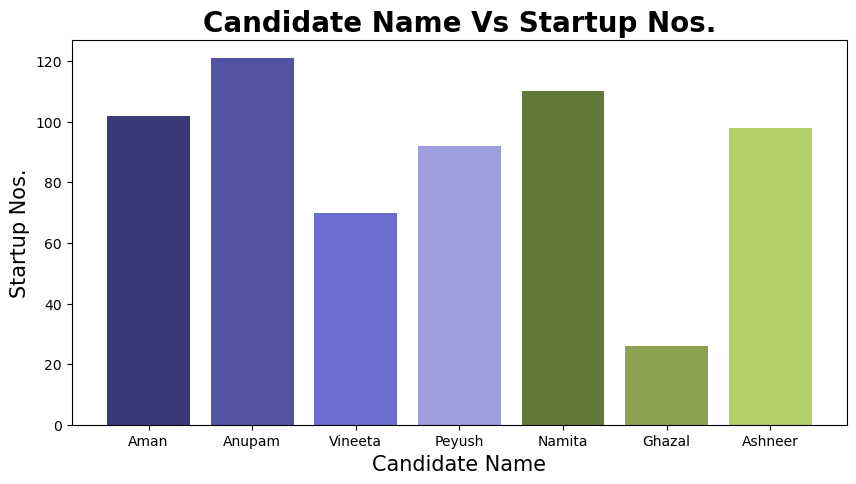

In [17]:
fig = plt.figure(figsize=(10,5))
col_map = plt.get_cmap('tab20b')
present = [aman_present, anupam_present, vineeta_present, peyush_present, namita_present, ghazal_present, ashneer_present]
names = ['Aman', 'Anupam', 'Vineeta', 'Peyush', 'Namita', 'Ghazal', 'Ashneer']

plt.bar(x=names, height=present, color=col_map.colors)
plt.xlabel("Candidate Name", fontdict={'fontsize':15})
plt.ylabel("Startup Nos.", fontdict={'fontsize':15})
plt.title("Candidate Name Vs Startup Nos.",fontdict={'fontsize': 20, 'weight': 550})
plt.show()

## b. Pie Chart Plot 

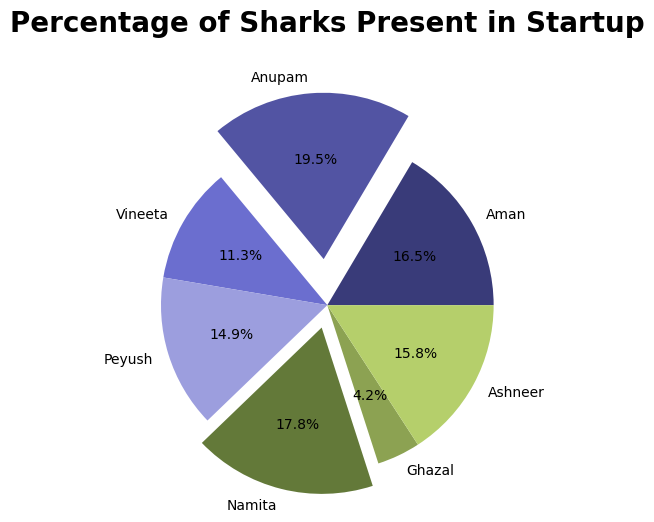

In [18]:
plt.figure(figsize=(5,3))
col_map = plt.get_cmap('tab20b')

plt.pie(x=present, labels=names, radius=1.8, autopct='%0.1f%%', explode=[0, 0.5, 0, 0, 0.25, 0, 0], colors=col_map.colors)
plt.title('Percentage of Sharks Present in Startup', fontdict={'fontsize': 20, 'weight': 550}, y=1.65)
plt.show()

- Anupam was present in 19.5% of the 36 episodes followed by Namita with 17.8%.

# Counting the Investment by Each Sharks

In [19]:
shark_tank['aman_invested'].value_counts()

0    92
1    29
Name: aman_invested, dtype: int64

In [20]:
shark_tank['anupam_invested'].value_counts()

0    97
1    24
Name: anupam_invested, dtype: int64

In [21]:
shark_tank['ashneer_invested'].value_counts()

0    100
1     21
Name: ashneer_invested, dtype: int64

In [22]:
shark_tank['ghazal_invested'].value_counts()

0    114
1      7
Name: ghazal_invested, dtype: int64

In [23]:
shark_tank['namita_invested'].value_counts()

0    97
1    24
Name: namita_invested, dtype: int64

In [24]:
shark_tank['peyush_invested'].value_counts()

0    93
1    28
Name: peyush_invested, dtype: int64

In [25]:
shark_tank['vineeta_invested'].value_counts()

0    105
1     16
Name: vineeta_invested, dtype: int64

In [26]:
aman_invested = len(shark_tank[shark_tank['aman_invested']==1])
anupam_invested = len(shark_tank[shark_tank['anupam_invested']==1])
ashneer_invested = len(shark_tank[shark_tank['ashneer_invested']==1])
ghazal_invested = len(shark_tank[shark_tank['ghazal_invested']==1])
namita_invested = len(shark_tank[shark_tank['namita_invested']==1])
peyush_invested = len(shark_tank[shark_tank['peyush_invested']==1])
vineeta_invested = len(shark_tank[shark_tank['vineeta_invested']==1])

# Plot the Investment by Each of the Sharks

## a. Bar Graph 

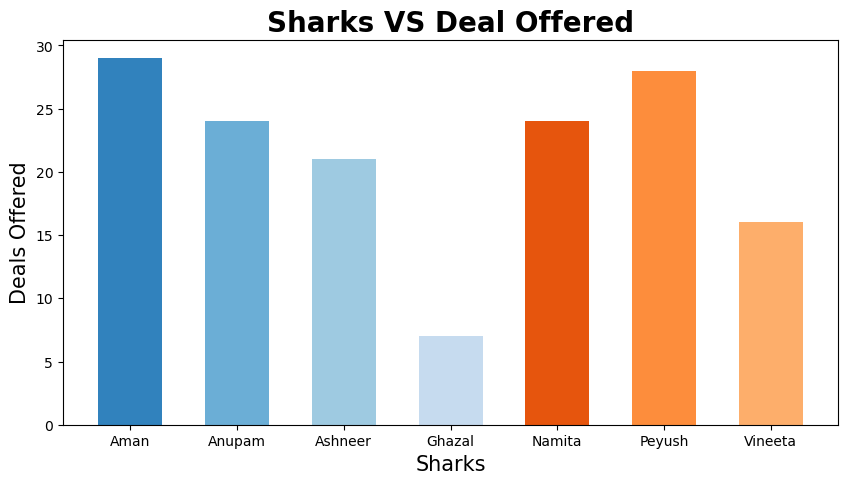

In [27]:
fig = plt.figure(figsize=(10,5))
col_map = plt.get_cmap('tab20c')

invested = [aman_invested, anupam_invested, ashneer_invested, ghazal_invested, namita_invested, peyush_invested,\
            vineeta_invested]
names = ['Aman', 'Anupam', 'Ashneer', 'Ghazal', 'Namita', 'Peyush', 'Vineeta']

plt.bar(x=names, height=invested, color=col_map.colors, width=0.6)
plt.title('Sharks VS Deal Offered', fontdict={'fontsize' : 20, 'weight' : 550})
plt.xlabel('Sharks', fontdict={'fontsize' : 15})
plt.ylabel('Deals Offered', fontdict={'fontsize' : 15})

plt.show()

## b. Pie Chart 

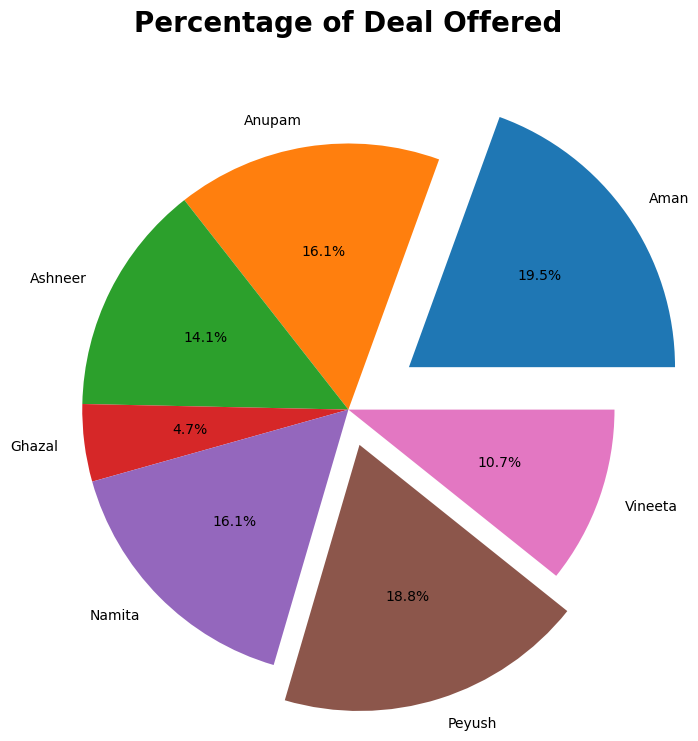

In [28]:
col_map = plt.get_cmap('tab20c')

plt.pie(x=invested, explode=[0.5, 0, 0, 0, 0, 0.25, 0], labels=names, radius=1.8, autopct='%.1f%%')
plt.title('Percentage of Deal Offered', y=1.5, fontdict={'fontsize' : 20, 'weight' : 550})

plt.show()

# Find the Top 10 Deals Offered by Sharks

In [29]:
top_deals = shark_tank.sort_values(by='deal_amount_lakhs', ascending=False).head(10)
top_deals

,episode_number,startup_number,brand_name,description,deal_offered,startup_ask_amount_lakhs,startup_ask_percentage,startup_ask_valuation,deal_amount_lakhs,deal_equity,...,ghazal_invested,namita_present,namita_invested,peyush_present,peyush_invested,vineeta_present,vineeta_invested,sharks_offering,amount_per_shark,equity_per_shark
50,17,51,Aas Vidyalaya,EdTech App,1,150.0,3.0,5000.00,150.0,15.0,...,0,1,1,1,1,0,0,3,50.000000,5.00
36,13,37,Annie,Braille Literary Device,1,30.0,5.0,600.00,105.0,3.0,...,0,1,1,1,1,0,0,3,35.000000,1.00
18,7,19,Raising Superstars,Child Development App,1,100.0,2.0,5000.00,100.0,4.0,...,0,1,0,0,0,1,0,2,50.000000,2.00
87,27,88,Insurance Samadhan,Insurance Solutions,1,100.0,1.0,10000.00,100.0,4.0,...,0,1,0,1,1,1,0,1,100.000000,4.00
15,6,16,Skippi Pops,Ice-Pops,1,45.0,5.0,900.00,100.0,15.0,...,0,1,1,0,0,1,1,5,20.000000,3.00
64,21,65,Get a Whey,Sugar-Free Icecream,1,100.0,8.0,1250.00,100.0,15.0,...,0,0,0,1,0,1,1,3,33.333333,5.00
12,5,13,Revamp Moto,E-Bike,1,100.0,1.0,10000.00,100.0,1.5,...,0,1,0,0,0,1,0,2,50.000000,0.75
39,14,40,The Renal Project,Home Dialysis Treatment,1,100.0,3.0,3333.33,100.0,6.0,...,0,1,1,1,0,0,0,2,50.000000,3.00
79,25,80,Sunfox Technologies,Portable ECG Device,1,100.0,2.0,5000.00,100.0,6.0,...,1,1,1,1,1,1,1,5,20.000000,1.20
42,15,43,Hammer Lifestyle,Smart Audio Products,1,30.0,3.0,1000.00,100.0,40.0,...,0,1,0,1,0,0,0,1,100.000000,40.00


# Plot the Top 10 Deals Offered by Sharks

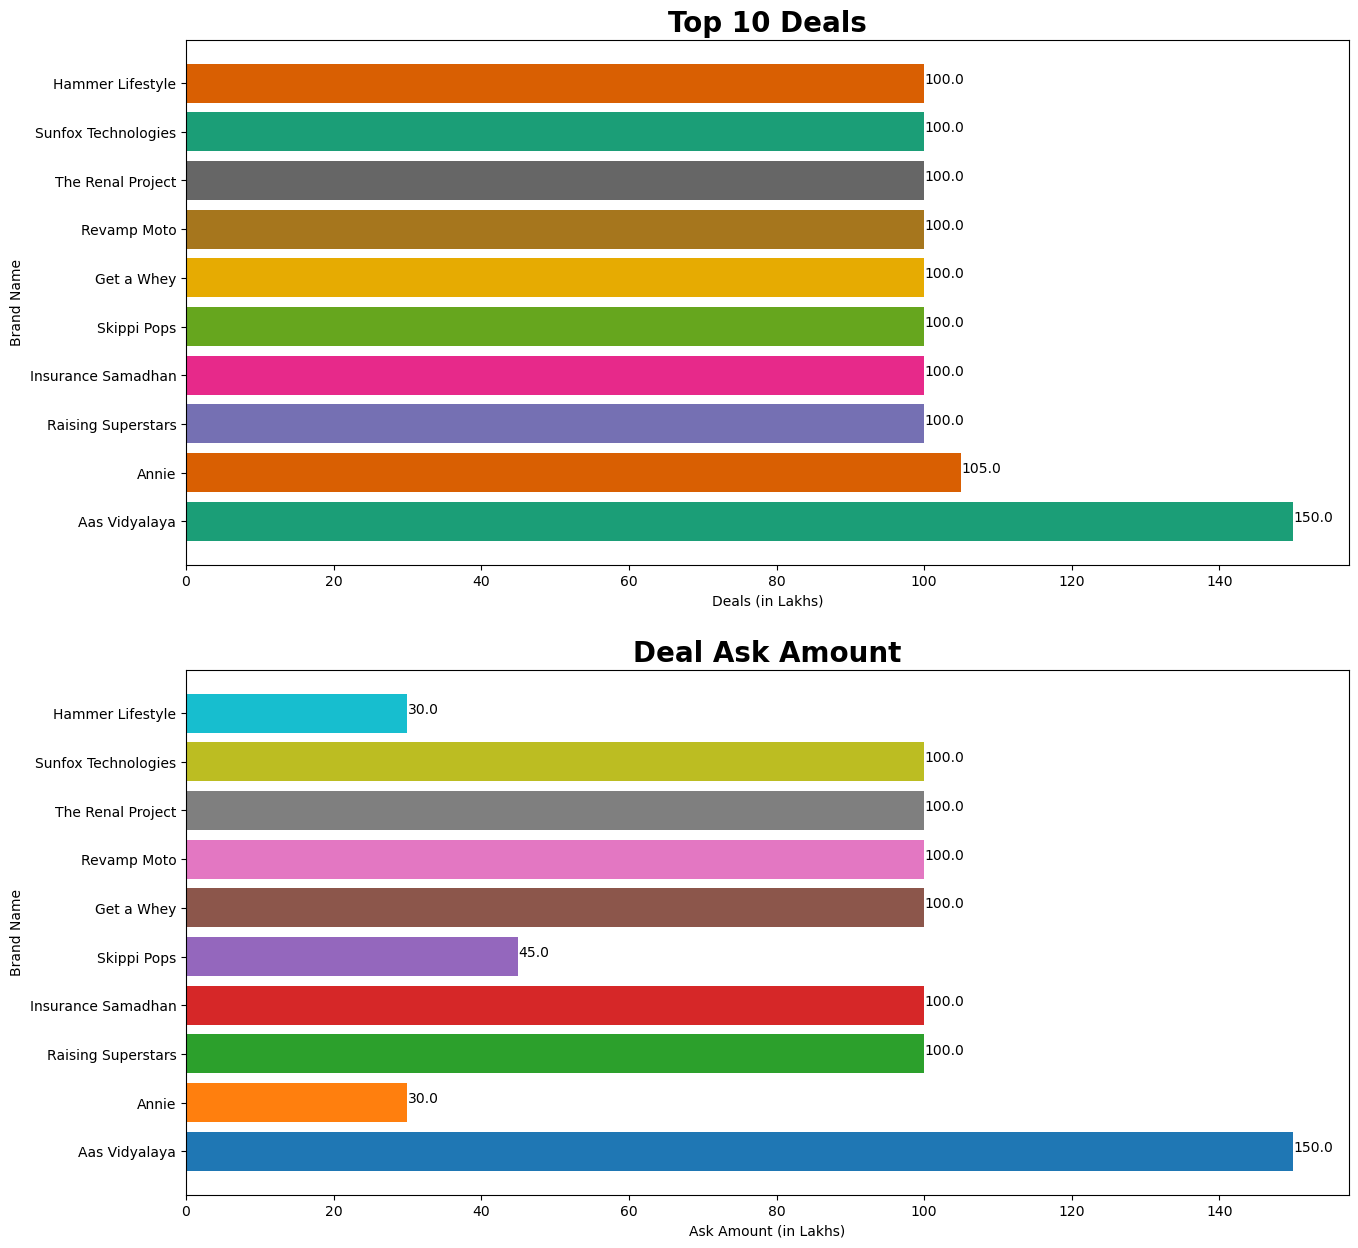

In [30]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15,15))

col_map = plt.get_cmap('Dark2')
axs[0].barh(y=top_deals['brand_name'], width=top_deals['deal_amount_lakhs'], color=col_map.colors)
axs[0].set_title('Top 10 Deals', fontdict={'fontsize':20, 'weight':550})
axs[0].set_xlabel('Deals (in Lakhs)')
axs[0].set_ylabel('Brand Name')
for i in range(len(top_deals)):
    axs[0].text(x=top_deals['deal_amount_lakhs'].iloc[i], y=top_deals['brand_name'].iloc[i],\
             s=top_deals['deal_amount_lakhs'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(y=top_deals['brand_name'], width=top_deals['startup_ask_amount_lakhs'], color=col_map.colors)
axs[1].set_title('Deal Ask Amount', fontdict={'fontsize':20, 'weight':550})
axs[1].set_xlabel('Ask Amount (in Lakhs)')
axs[1].set_ylabel('Brand Name')
for i in range(len(top_deals)):
    axs[1].text(x=top_deals['startup_ask_amount_lakhs'].iloc[i], y=top_deals['brand_name'].iloc[i], \
             s=top_deals['startup_ask_amount_lakhs'].iloc[i])
    
plt.show()

# Total Deals Taking Place Out of 121

In [31]:
deals_taking_place = shark_tank[shark_tank['deal_offered']==1].shape[0]
deals_taking_place

68

In [32]:
deals_not_taking_place = shark_tank[shark_tank['deal_offered']==0].shape[0]
deals_not_taking_place

53

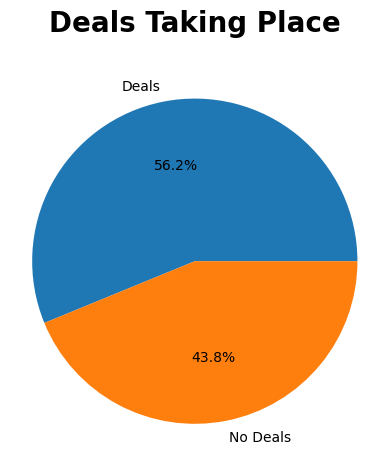

In [33]:
plt.pie(x=[deals_taking_place, deals_not_taking_place], labels=['Deals', 'No Deals'], radius=1.1, autopct='%.1f%%')
plt.title('Deals Taking Place', y=1.1, fontdict={'fontsize':20, 'weight':550})
plt.show()

- 56.2% of 121 deals took place in the season 1 of shark tank.